In [2]:
%matplotlib inline
import pandas as pd
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels
import numpy as np
from  matplotlib.ticker import FuncFormatter

In [3]:
sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

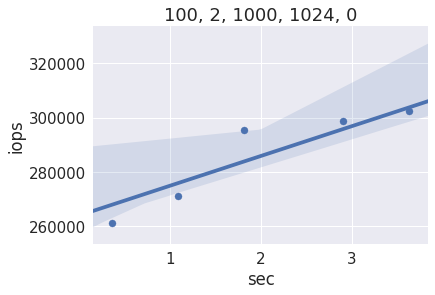

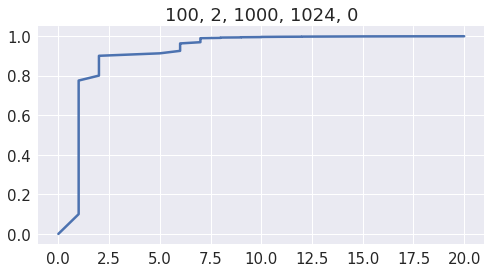

In [17]:
def plot(prefix):
    m = re.match("es-(?P<es>\d+).qd-(?P<qd>\d+).w-(?P<wd>\d+).cs-(?P<cs>\d+).ep-(?P<ep>\d+)", prefix)
    entry_size = m.group("es")
    qdepth = m.group("qd")
    width = m.group("wd")
    cache_size = m.group("cs")
    eviction = m.group("ep")
    
    iops = pd.read_csv("{}.iops.csv".format(prefix))
    iops["sec"] = (iops.us - min(iops.us)) / 1000000
    ax = sns.regplot(iops.sec, iops.iops, x_bins=10, truncate=True)
    ax.set_title("{}, {}, {}, {}, {}".format(
        entry_size, qdepth, width, cache_size, eviction))
    
    lat = pd.read_csv("{}.latency.csv".format(prefix))
    lat = lat[~(lat.Percentile > 0.999)]
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(lat.Value, lat.Percentile)
    ax.set_title("{}, {}, {}, {}, {}".format(
        entry_size, qdepth, width, cache_size, eviction))
    
plot("es-100.qd-2.w-1000.cs-1024.ep-0")